### Linear Regression using Metropolis Method

### Metropolis method for linear regression problem

### Make linear data

In [1]:
from sklearn import datasets, linear_model

# Parameters
N = 100
p = 1
intercept = 10
sig = 5
state = 125
X, y = datasets.make_regression(n_samples=N, n_features=p, bias=intercept,
                                      n_informative=1, noise=sig, random_state=state)

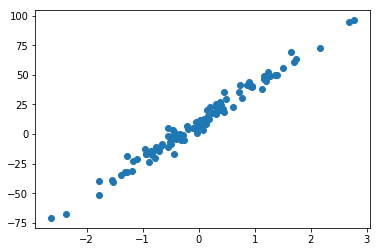

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(X, y)
plt.show()

### Prior probability $p(w)$

In [3]:
def prior_prob(w, beta):
    z = 1/(2*beta**2)
    return np.log((z/np.pi)) + (-z*(w[0]**2+w[1]**2))

### Likelihood function $p(y|w)$
errorが大きくなると値が小さくなりすぎて計算不可能となるため、ここでは対数尤度関数とする

In [4]:
def log_likelihood_function(w, alpha):
    z = (1/(2*np.pi*alpha**2))**(len(X)/2)
    error_sum = np.sum((y-(w[0]+w[1]*X))**2)
    return np.log(z) + (-1/(2*alpha**2))*error_sum

### Compute probability ratio $r$

In [5]:
def compute_prob_ratio(w, wn, beta, alpha):
    tp = log_likelihood_function(w, alpha)
    prob_bef = prior_prob(w, beta) + log_likelihood_function(w, alpha)
    prob_aft = prior_prob(wn, beta) + log_likelihood_function(wn, alpha)
    return prob_aft / prob_bef

### Function of metropolis method

In [6]:
import random
import copy

def metropolis_method(rv, w, mu, sigma, beta, alpha):
    ### Step 2 : Move w
    wn = w + rv

    ### Step 3 : Compute probability ratio
    r = compute_prob_ratio(w, wn, beta, alpha)

    ### Step 4 : Generate a random value
    R = random.uniform(0, 1)

    ### Step 5
    if r > R:
        return wn
    else:
        return w

### Execute

In [20]:
import numpy as np
def execute(w, mu, sigma, beta, alpha, repeat=100):
    ret = []
    ret.append(w)
    ### Step 1 : Generate random values from 2-dim normal distribution
    random_values = np.random.multivariate_normal(mu, sigma, repeat)
    for rv in random_values:
        w = metropolis_method(rv, w, mu, sigma, beta, alpha)
        ret.append(w)
    return ret

# パラメータ
mu = [0, 0]
sigma = [[1,0],[0,1]]
beta = 1.
alpha = 1.
repeat = 1000

# 初期状態
w = np.array([0., 0.])

# 実行
output = np.array(execute(w, mu, sigma, beta, alpha, repeat))

### Plot

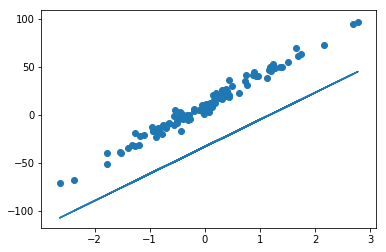

In [21]:
y_ = output[-1][0] + output[-1][1] * X
plt.plot(X, y_)
plt.scatter(X, y)
plt.show()